In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


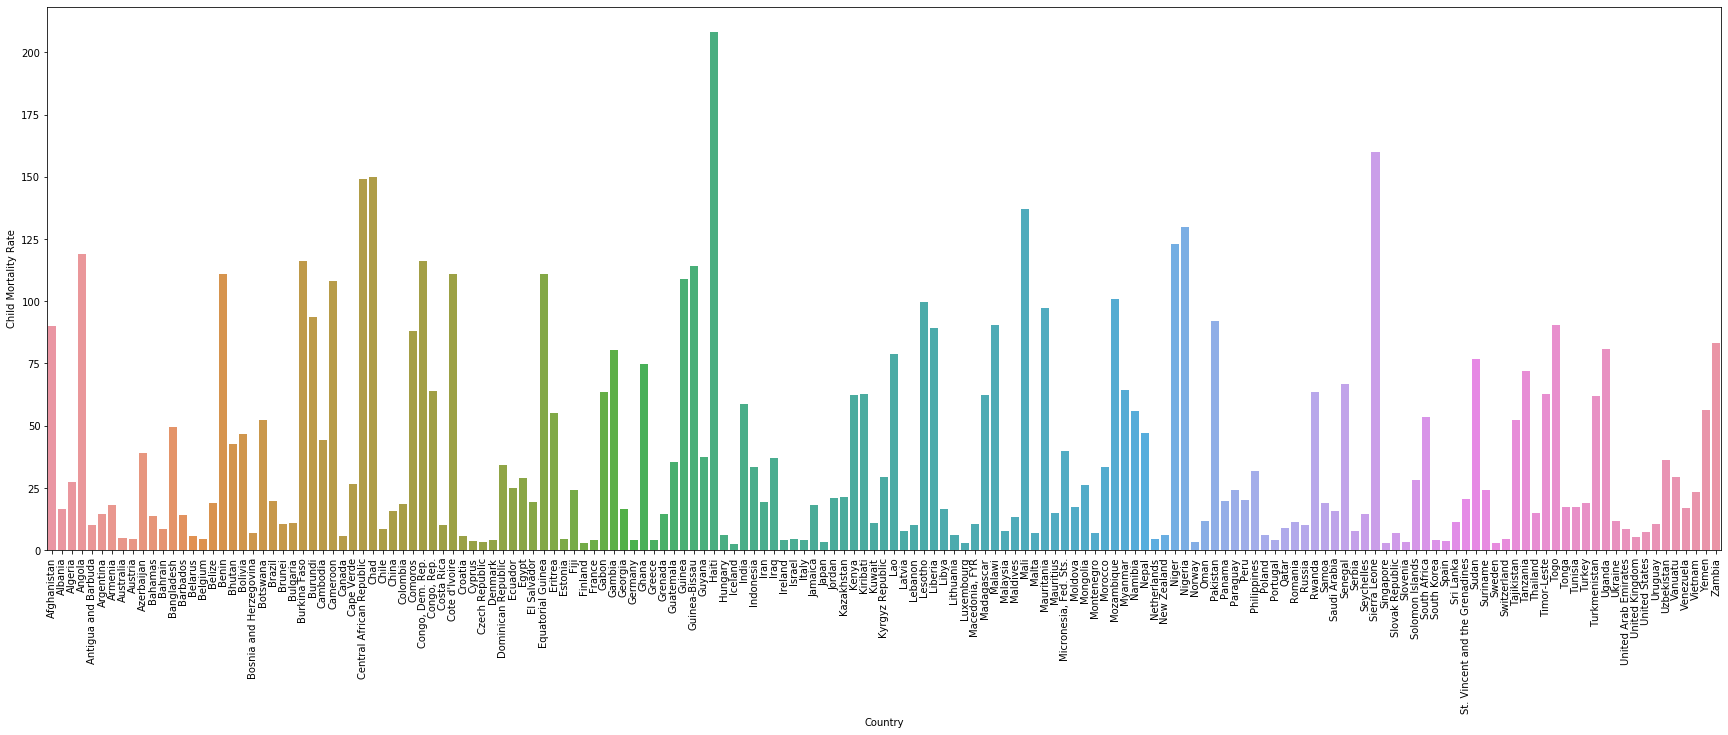

In [6]:
#Let us visualize the data presented given in the table
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['child_mort'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Child Mortality Rate')
plt.show()

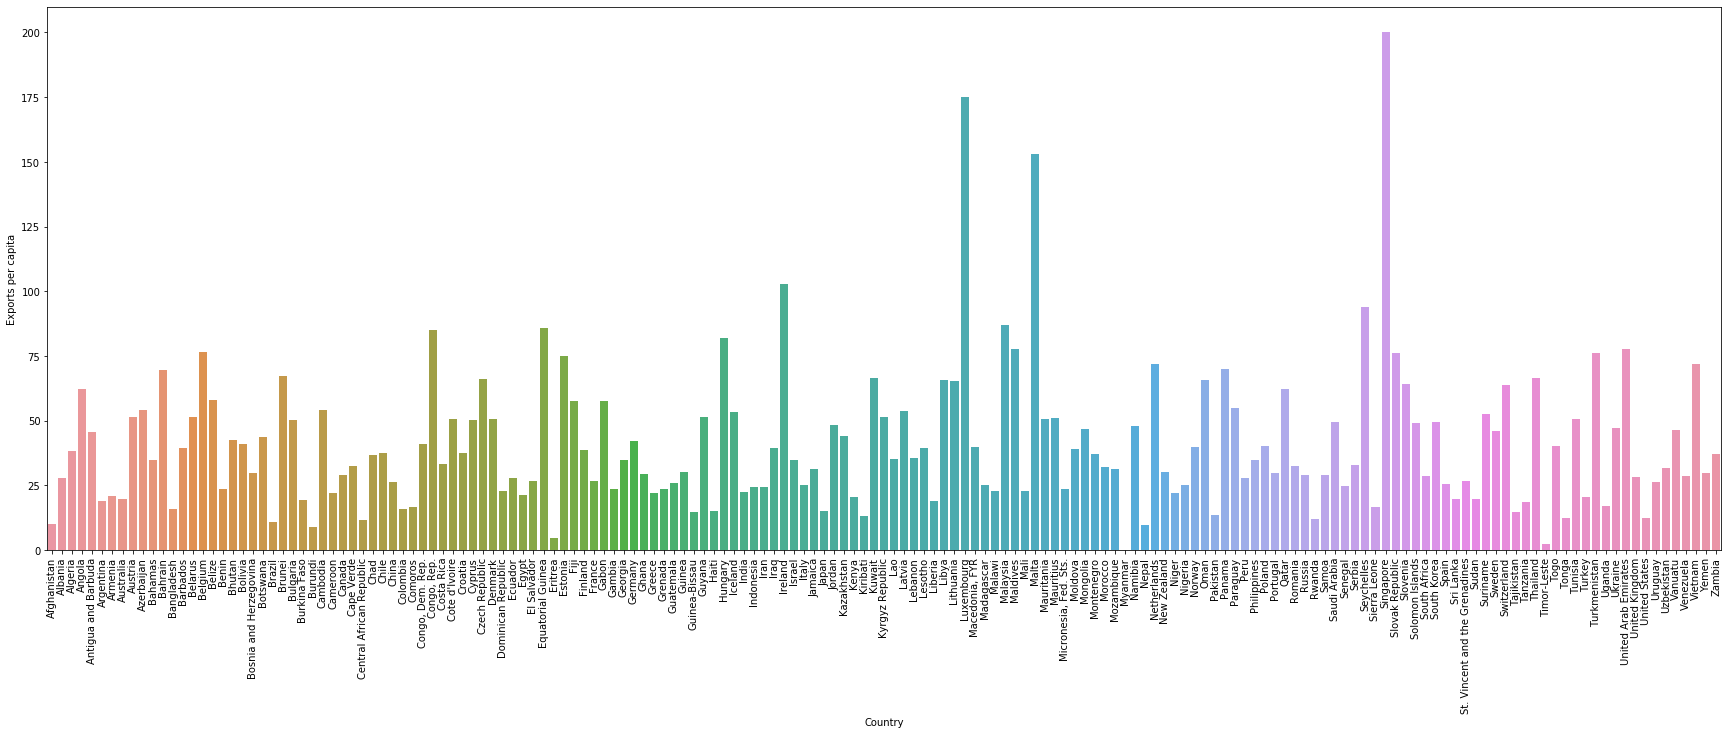

In [7]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['exports'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Exports per capita')
plt.show()

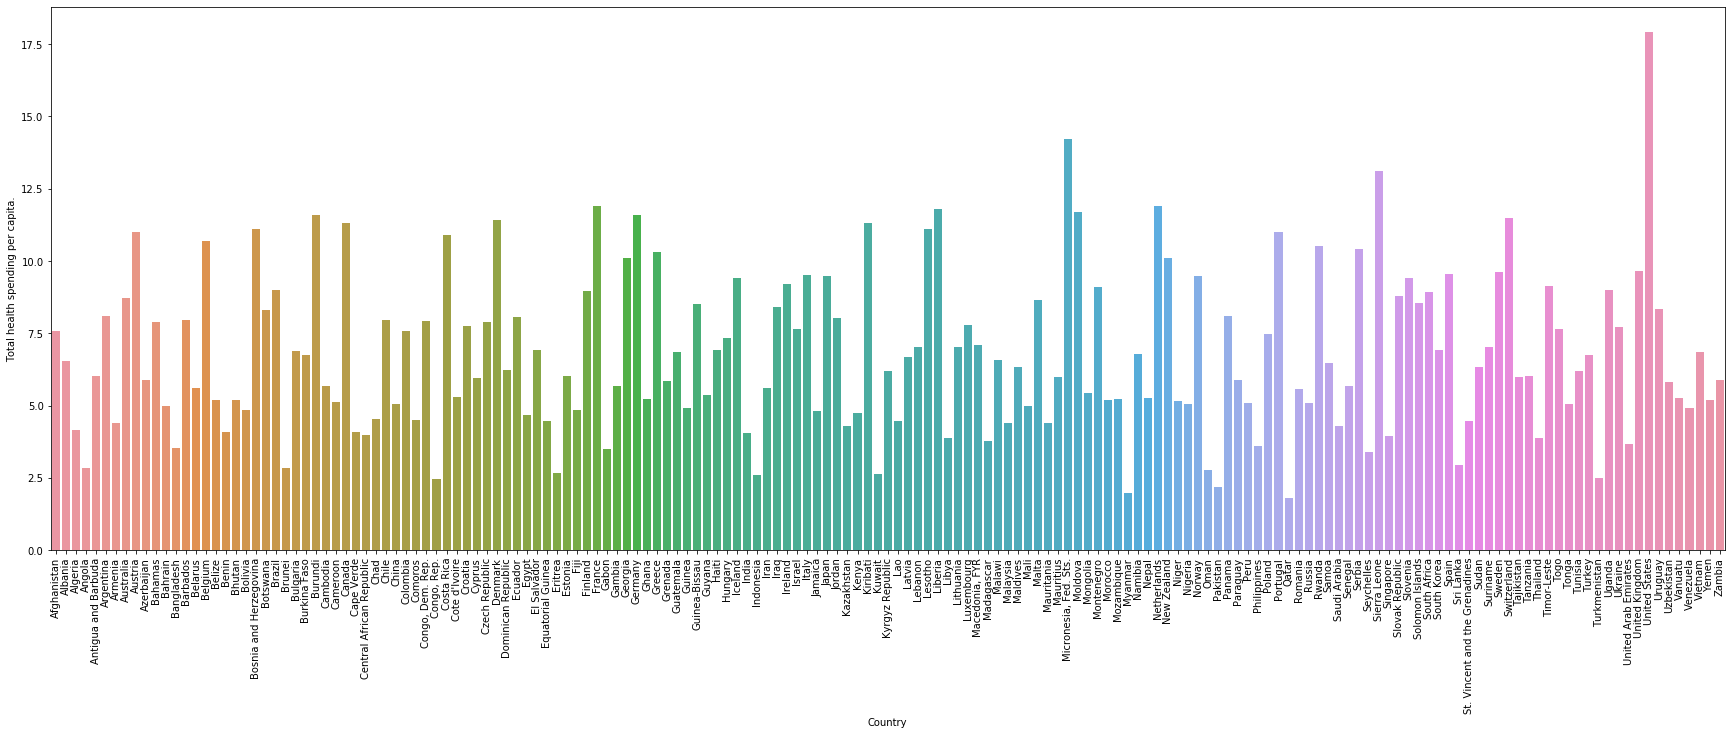

In [8]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['health'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Total health spending per capita.')
plt.show()

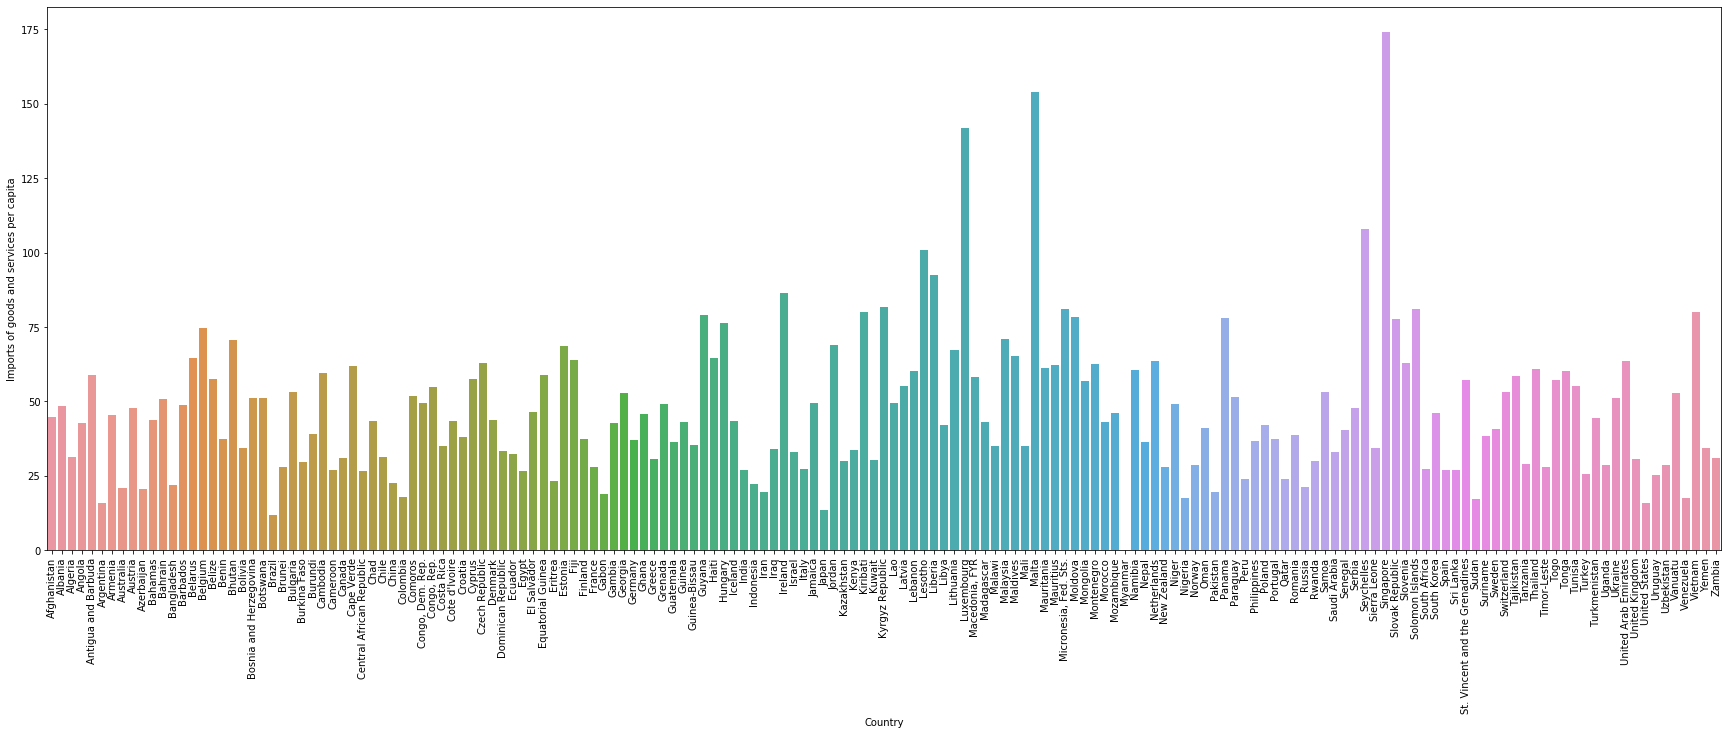

In [9]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['imports'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Imports of goods and services per capita')
plt.show()

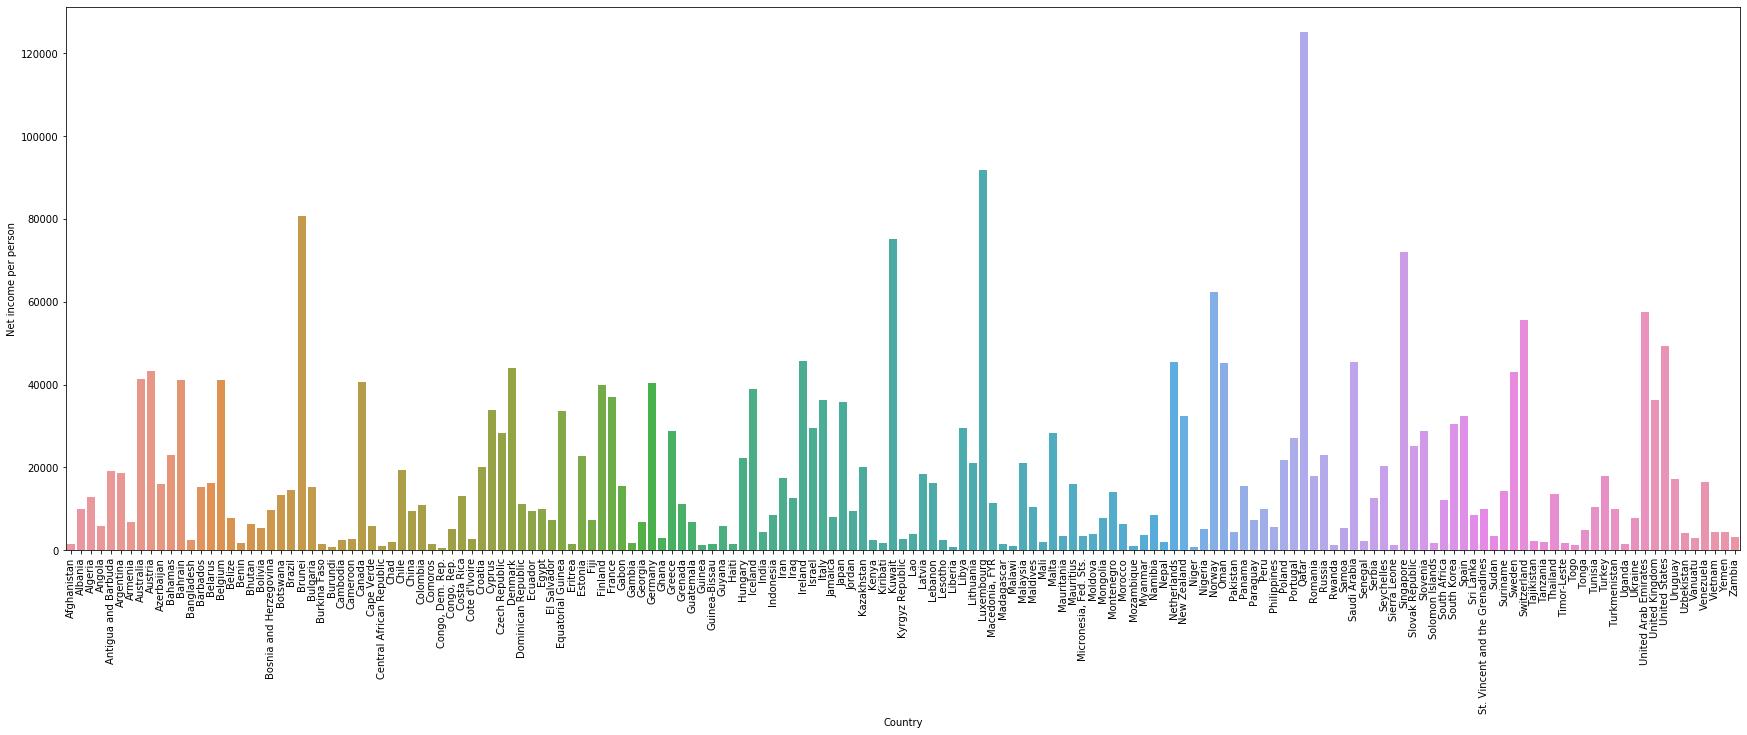

In [10]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['income'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Net income per person')
plt.show()

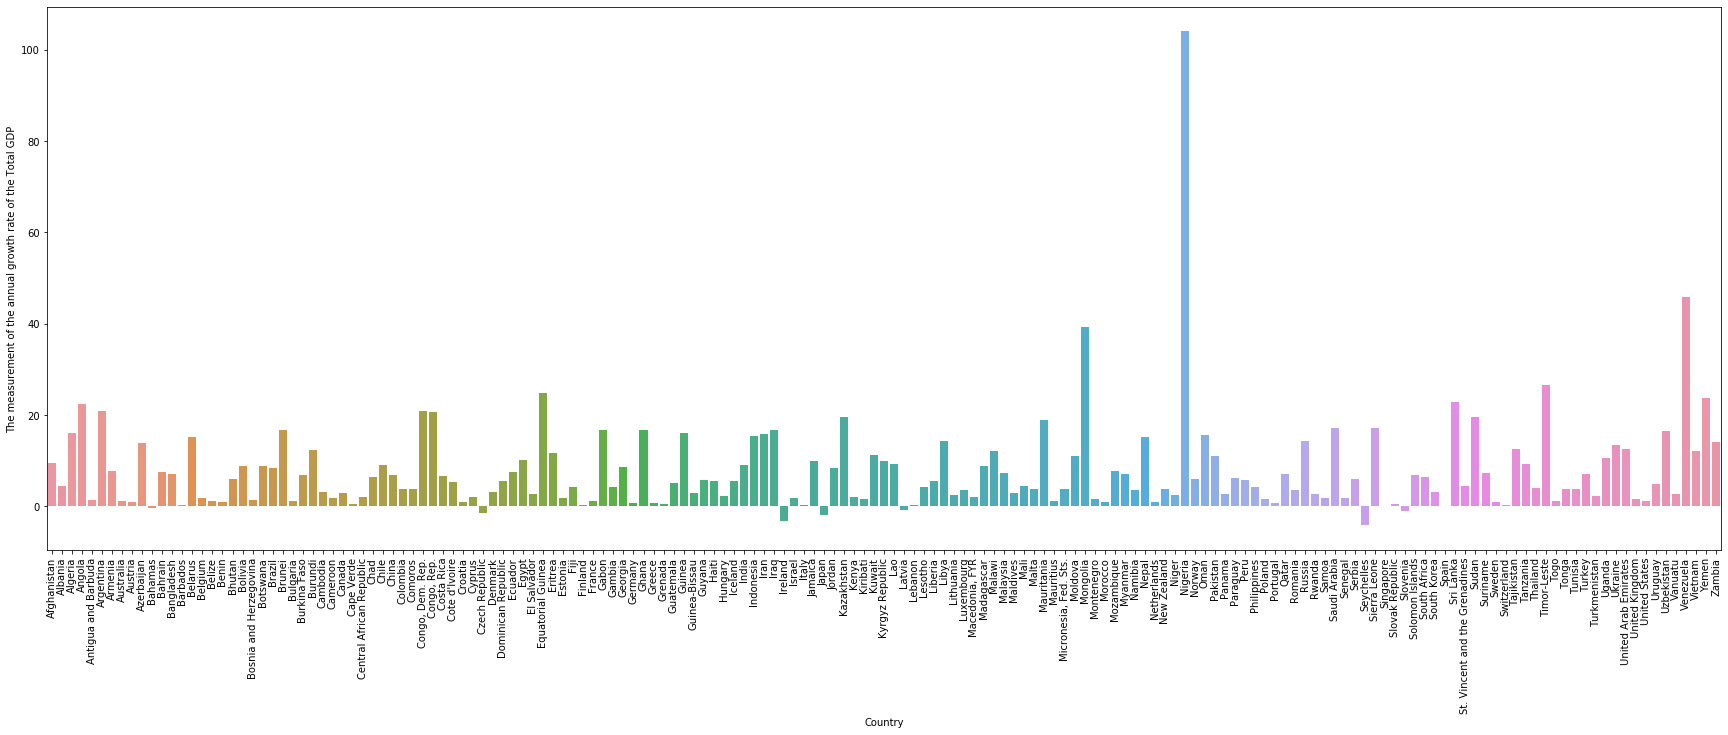

In [11]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['inflation'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('The measurement of the annual growth rate of the Total GDP')
plt.show()

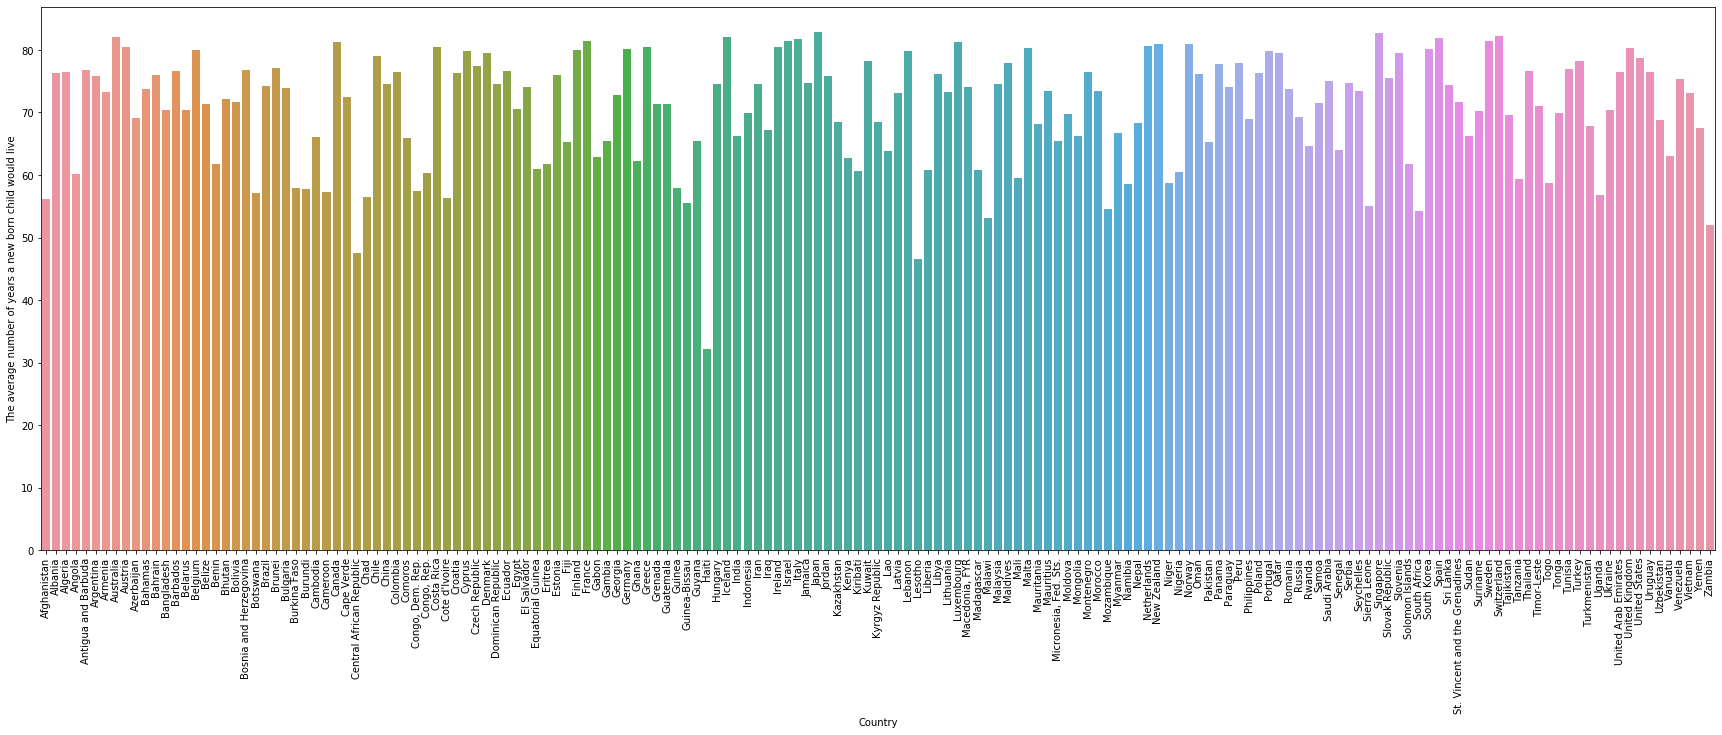

In [12]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['life_expec'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('The average number of years a new born child would live')
plt.show()

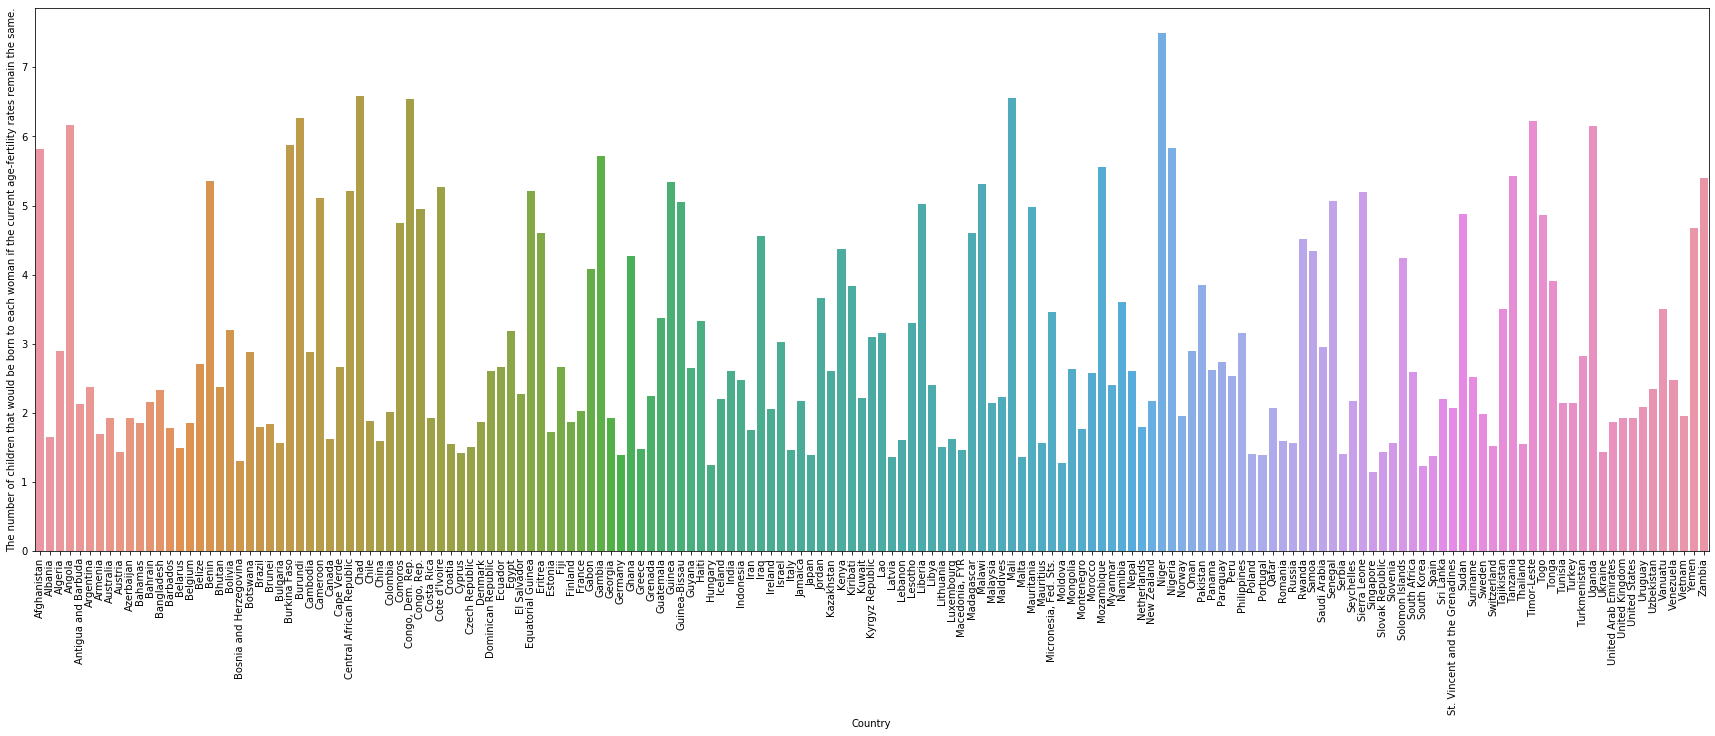

In [13]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['total_fer'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('The number of children that would be born to each woman if the current age-fertility rates remain the same.')
plt.show()

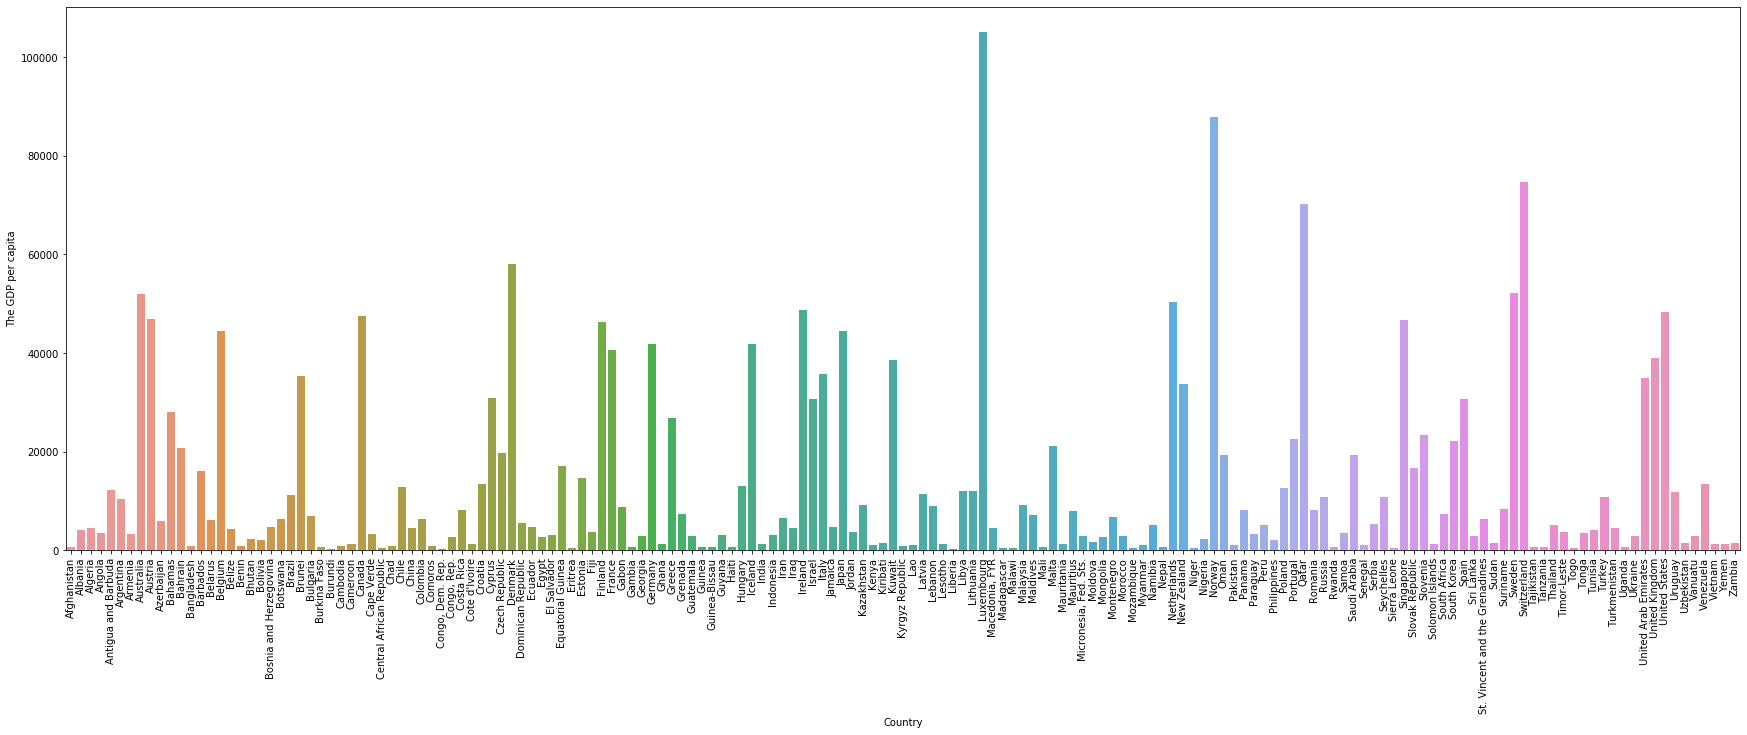

In [14]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = df['country'],y = df['gdpp'],data = df)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('The GDP per capita')
plt.show()

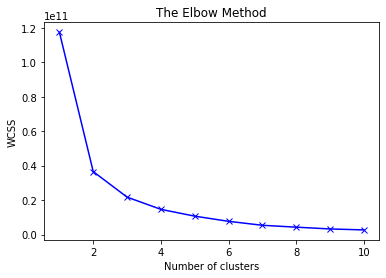

In [4]:
#Running the WCSS Metod to determine the suitable no. of clusters
wcss = []
X = df.iloc[:,[i for i in range(1,10)]].values
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#From the above graph, we choose 3 to be the optimal value of k
#Running K Means clustering with K = 3
kmeans = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=21)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [6]:
centers = kmeans.cluster_centers_
print(centers)

[[4.73898437e+01 3.58656172e+01 6.33203125e+00 4.59216086e+01
  8.56924219e+03 8.95764844e+00 6.78734375e+01 3.26335938e+00
  4.43839063e+03]
 [8.80000000e+00 4.99781250e+01 8.99156250e+00 4.60218750e+01
  3.76218750e+04 3.38331250e+00 7.91562500e+01 1.94468750e+00
  3.55875000e+04]
 [6.22857143e+00 9.64428571e+01 5.71285714e+00 6.85714286e+01
  8.03428571e+04 6.38871429e+00 8.02857143e+01 1.76714286e+00
  6.54428571e+04]]


Text(0, 0.5, 'Exports per capita')

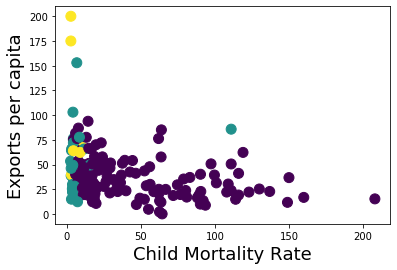

In [13]:
plt.scatter(x = X[:,0], y = X[:,1], c = y_kmeans, s=100)
plt.xlabel("Child Mortality Rate", fontsize = 18)
plt.ylabel("Exports per capita", fontsize = 18)

Text(0, 0.5, 'Imports of goods and services per capita ')

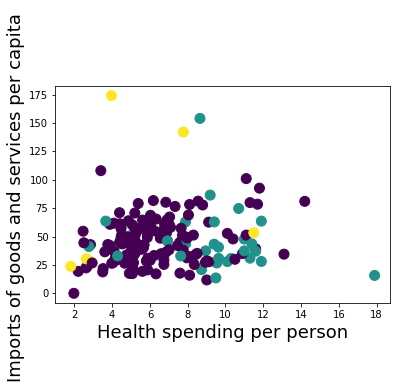

In [14]:
plt.scatter(x = X[:,2],y = X[:,3],s=100, c=y_kmeans)
plt.xlabel("Health spending per person", fontsize = 18)
plt.ylabel("Imports of goods and services per capita ", fontsize = 18)

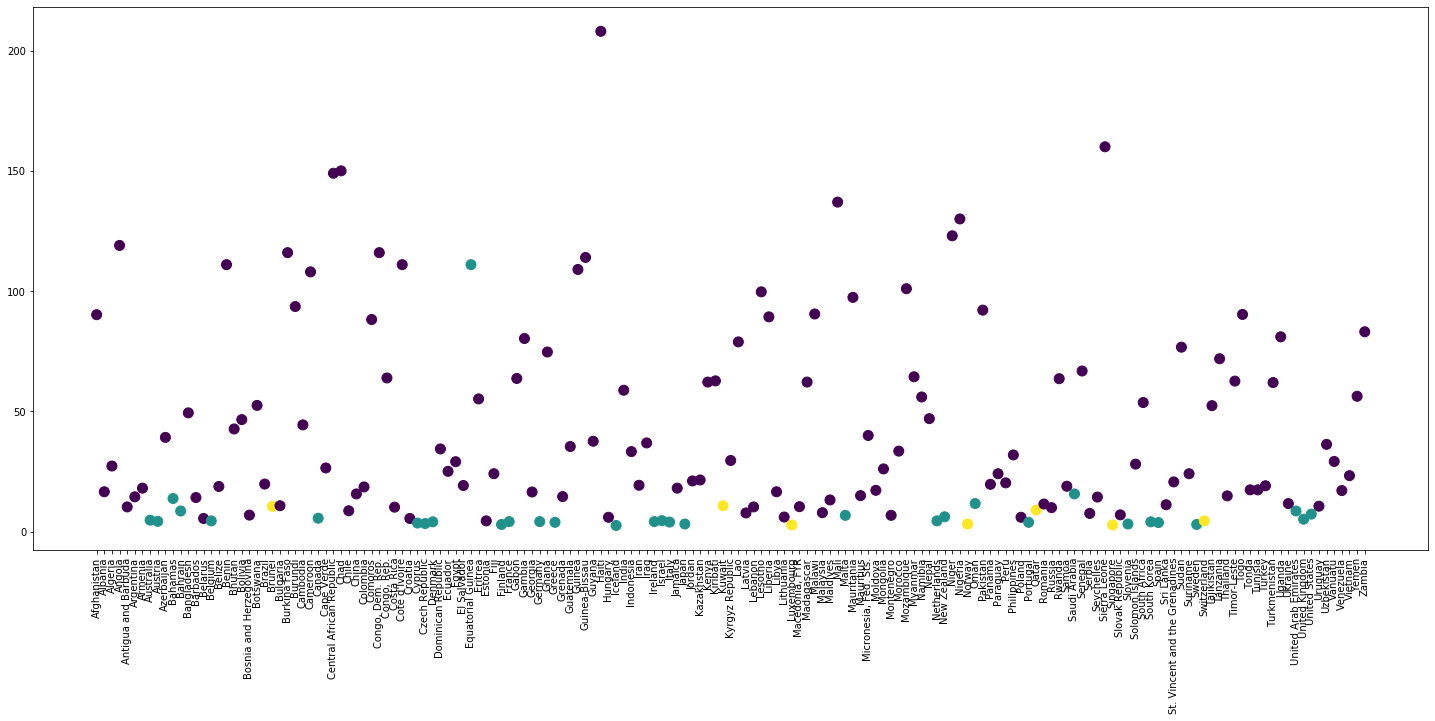

In [20]:
countries = list(df.iloc[:,0])
plt.figure(figsize=(25,10))
plt.scatter(x = countries, y = X[:,0],c = y_kmeans,s = 100)
plt.xticks(rotation = 90)
plt.show()
plt.legend()

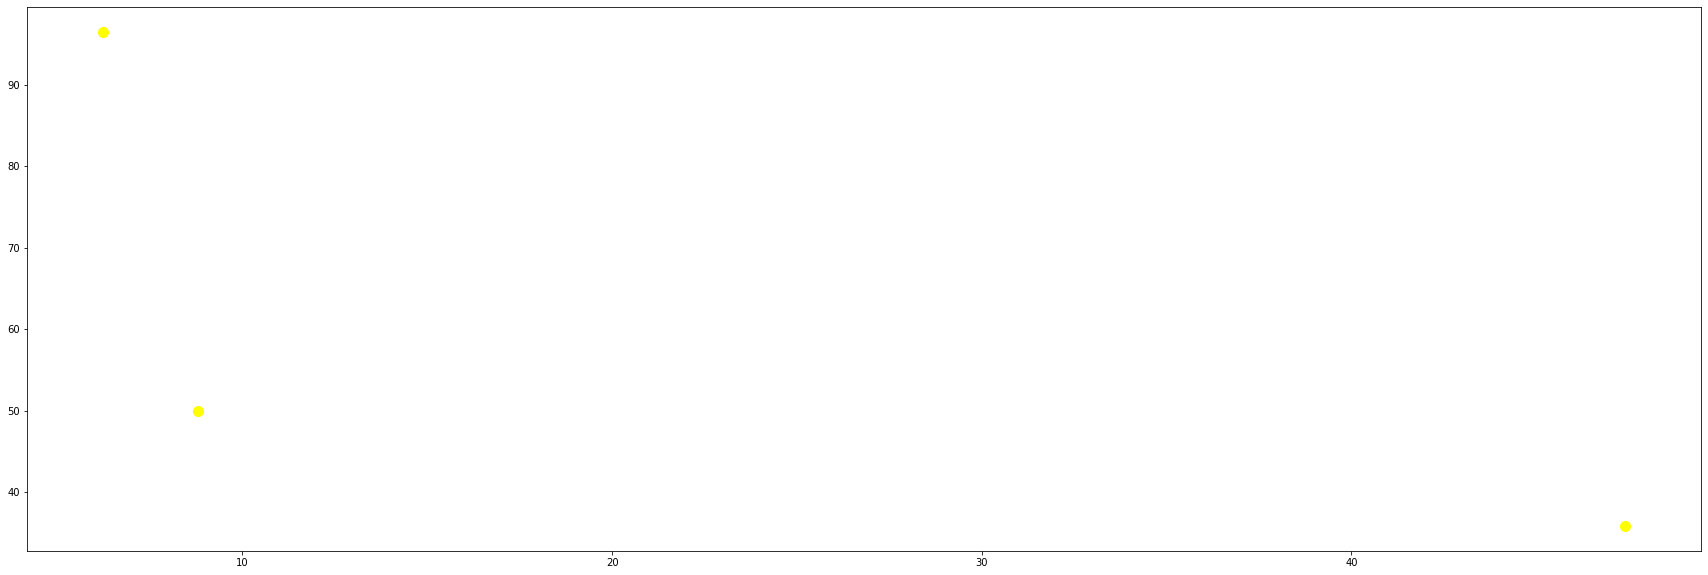

In [7]:
#Plotting the centroids
plt.figure(figsize=(30,10))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = "yellow",
           label = "centroids")
plt.show()

In [11]:
#Thus we have inferred that countries are categorised into three categories
#0 - which are in dire need of aid
#1 and 2 - not in dire of aid
#Let us try to make a prediction
countries = np.array(df.iloc[:,0])
parameters = {}
for i,j in zip(countries,y_kmeans):
    parameters[i] = j
print(parameters)

{'Afghanistan': 0, 'Albania': 0, 'Algeria': 0, 'Angola': 0, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 1, 'Bahrain': 1, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 0, 'Brazil': 0, 'Brunei': 2, 'Bulgaria': 0, 'Burkina Faso': 0, 'Burundi': 0, 'Cambodia': 0, 'Cameroon': 0, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 0, 'Chad': 0, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 0, 'Congo, Dem. Rep.': 0, 'Congo, Rep.': 0, 'Costa Rica': 0, "Cote d'Ivoire": 0, 'Croatia': 0, 'Cyprus': 1, 'Czech Republic': 1, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 1, 'Eritrea': 0, 'Estonia': 0, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 0, 'Gambia': 0, 'Georgia': 0, 'Germany': 1, 'Ghana': 0, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 0, 'Gui

In [29]:
x = input("Enter the name of the country: ")
y = lambda x : parameters[x]
print(x,"is in dire need of aid") if y(x) == 0 else print(x," is not in dire need of aid")

Enter the name of the country:  Afghanistan


Afghanistan is in dire need of aid


<function __main__.<lambda>(x)>